---
# <font color="#CA3532">Deep Learning Fundamentals and Basic Tools - Lab Assignment 2</font>
---

Last updated on 2020-09-22


---

*SESSION 1 (Wednesday, 2020-09-23):*

- This assingment is centered in the use of [Keras](https://keras.io/)

- Keras is an open-source neural-network library. Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible.

- Keras itself can work using different motors. We will use it with TensorFlow under the hood.

- We will see how easily is to create neural networks with keras and the wide variety of configurations for our network we can use.

** Instructions and work environment sections from the 1st assingment still valid **


In [1]:
# TO-DO: Include your names and NIAs here:
student_data = [{'name': 'Name of 1st student', 'nia': 'NIA of 1st student'},
                {'name': 'Name of 2nd student', 'nia': 'NIA of 2nd student'}]

### <font color="#CA3532">Import the libraries</font>

TensorFlow officially included Keras, so if you have TensorFlow, you have keras!

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import keras as k
from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import StandardScaler

!git clone https://github.com/luisferuam/DLFBT-LAB
import sys
sys.path.append('DLFBT-LAB')
import dlfbt

fatal: destination path 'DLFBT-LAB' already exists and is not an empty directory.


### <font color="#CA3532">Data set</font>


In [3]:
dataset_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/phoneme.csv'
# Details https://raw.githubusercontent.com/jbrownlee/Datasets/master/phoneme.names

dataset = np.loadtxt(dataset_url, delimiter=',')

# Split database in atributtes and classes
print(dataset)

#-------------------------------------------------------------------------------
# TO-DO block: Divide attributes and classes/labels. Store the numer of atrributes
#-------------------------------------------------------------------------------
y=dataset[:,-1]
x=dataset[:,0:-1]
x_size=np.size(x, axis=1)
#-------------------------------------------------------------------------------
# End of TO-DO block
#-------------------------------------------------------------------------------

[[ 1.24   0.875 -0.205 -0.078  0.067  0.   ]
 [ 0.268  1.352  1.035 -0.332  0.217  0.   ]
 [ 1.567  0.867  1.3    1.041  0.559  0.   ]
 ...
 [ 1.031  0.584  1.866  1.532 -0.671  1.   ]
 [ 0.15   0.933  2.363 -0.742 -0.617  0.   ]
 [ 0.137  0.714  1.35   0.972 -0.63   1.   ]]


In [4]:
# Final result with the classes stored in y
print(x_size)
print(x)
print(y)

5
[[ 1.24   0.875 -0.205 -0.078  0.067]
 [ 0.268  1.352  1.035 -0.332  0.217]
 [ 1.567  0.867  1.3    1.041  0.559]
 ...
 [ 1.031  0.584  1.866  1.532 -0.671]
 [ 0.15   0.933  2.363 -0.742 -0.617]
 [ 0.137  0.714  1.35   0.972 -0.63 ]]
[0. 0. 0. ... 1. 0. 1.]


In [10]:
# Normalize the data
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

### <font color="#CA3532">Defining our model</font>

- From the input to the output in keras we can define the properties of each laye (size, activation function, connectivity topology...) with the sequential mode.

- In this case we are going to create our basic multilayer feedforward network



In [16]:
# Define the model using keras
nn = Sequential()

#-------------------------------------------------------------------------------
# TO-DO block: Add fully connected layers to create a MLP like in assignment 1
#-------------------------------------------------------------------------------
nn.add(Dense(10, 'sigmoid', input_shape=(5,), use_bias=True))
#nn.add(keras.Input(shape=(x_size, )))

#nn.add(Dense(10, 'sigmoid', use_bias=True))

nn.add(Dense(1, 'linear', use_bias=True))


#-------------------------------------------------------------------------------
# End of TO-DO block
#-------------------------------------------------------------------------------

### <font color="#CA3532">Compile the network</font>

- Compile is the step where our network is created

- Here we have to define different aspects involved in the trainning of the network

- In each section you have an URL to the official documentation. Take a look at the availability of different strategies in each case.

- It is possible to also define your own functions for this.

### <font color="#CA3532"> Optimizer </font>

Strategy to calculate the weights corrections

https://keras.io/api/optimizers/


### <font color="#CA3532"> Loss function </font>

The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.

https://keras.io/api/losses/

### <font color="#CA3532"> Metrics (results) </font>

A metric is a function that is used to judge the performance of your model.

Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model. Note that you may use any loss function as a metric.

https://keras.io/api/metrics/

In [17]:
# Compile

#-------------------------------------------------------------------------------
# TO-DO block: Compile your network, to reproduce the assignment 1 MLP
#-------------------------------------------------------------------------------
#loss_f=k.losses.CategoricalCrossentropy(
#    from_logits=True
#)
learning_RATE=0.01
nn.compile(optimizer = keras.optimizers.SGD(learning_rate=learning_RATE), loss='mse', metrics=['accuracy'])
#-------------------------------------------------------------------------------
# End of TO-DO block
#-------------------------------------------------------------------------------

### <font color="#CA3532">Train the network</font>

The Fit method trains the network according to the data.

Here we introduce all the data together and select a 20% of the data for validation purposes.

Other ways to do this are allowed, including the optimization of the parameters.

https://keras.io/api/models/model_training_apis/#fit-method

In [20]:
# Fit
history = nn.fit(x, y, epochs=500, verbose=1, validation_split=0.2)

# Fit
#history = nn.fit(x, y, epochs=50, verbose=0, validation_split=0.2)

Epoch 1/500
136/136 [==============================] - 1s 9ms/step - loss: 0.1567 - accuracy: 0.7562 - val_loss: 0.1530 - val_accuracy: 0.7465
Epoch 2/500
136/136 [==============================] - 1s 7ms/step - loss: 0.1565 - accuracy: 0.7546 - val_loss: 0.1536 - val_accuracy: 0.7438
Epoch 3/500
136/136 [==============================] - 1s 6ms/step - loss: 0.1568 - accuracy: 0.7527 - val_loss: 0.1527 - val_accuracy: 0.7475
Epoch 4/500
136/136 [==============================] - 1s 6ms/step - loss: 0.1566 - accuracy: 0.7497 - val_loss: 0.1530 - val_accuracy: 0.7475
Epoch 5/500
136/136 [==============================] - 1s 6ms/step - loss: 0.1564 - accuracy: 0.7525 - val_loss: 0.1543 - val_accuracy: 0.7660
Epoch 6/500
136/136 [==============================] - 1s 4ms/step - loss: 0.1565 - accuracy: 0.7536 - val_loss: 0.1526 - val_accuracy: 0.7493
Epoch 7/500
136/136 [==============================] - 0s 3ms/step - loss: 0.1565 - accuracy: 0.7525 - val_loss: 0.1527 - val_accuracy: 0.7586

In [21]:
# Network details
nn.summary()
print('\n\n')

# Evaluate (similar to fit but just considering 1 epoch iteration without changing the network)
loss, accuracy = nn.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))

# Also, the predict method is available to classify unlabeled data

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                60        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 71 (284.00 Byte)
Trainable params: 71 (284.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



169/169 [==============================] - 0s 2ms/step - loss: 0.1201 - accuracy: 0.8164
Accuracy: 81.64


### <font color="#CA3532">Plot data</font>

- History object saves the different epoch data

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


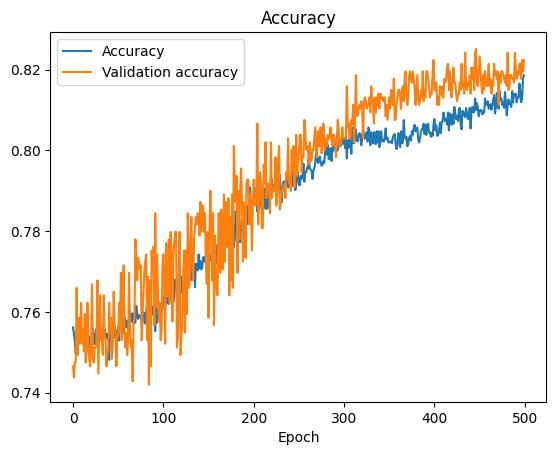

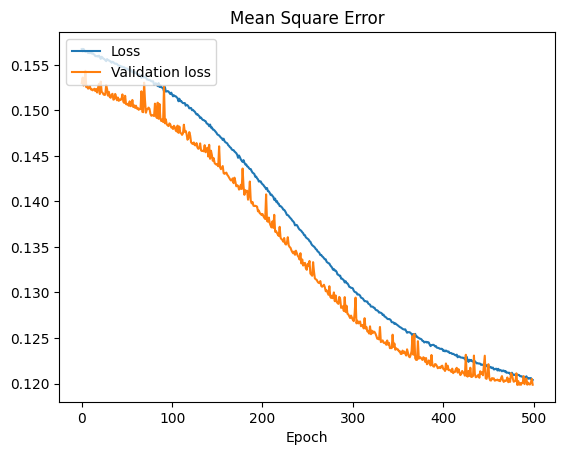

In [22]:
# Plot history

print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
#-------------------------------------------------------------------------------
# TO-DO block: Explain what you observe
#-------------------------------------------------------------------------------
# Using a small number of neurons in the hidden layer (~= input layer)

# Using a big number of neurons in the hidden layer (>> input layer)

#-------------------------------------------------------------------------------
# End of TO-DO block
#-------------------------------------------------------------------------------

### <font color="#CA3532">Optimize the network design</font>

- Change the network arquitecture, introducing more layers and neurons to obtain a better result. You can:
 - Add more and different type of layers
 - Change the activation funcions
 - Change the loss / optimizer




Epoch 1/250
136/136 [==============================] - 2s 7ms/step - loss: 0.1838 - accuracy: 0.7421 - val_loss: 0.1537 - val_accuracy: 0.7641
Epoch 2/250
136/136 [==============================] - 1s 5ms/step - loss: 0.1506 - accuracy: 0.7636 - val_loss: 0.1441 - val_accuracy: 0.7706
Epoch 3/250
136/136 [==============================] - 1s 5ms/step - loss: 0.1432 - accuracy: 0.7726 - val_loss: 0.1386 - val_accuracy: 0.7761
Epoch 4/250
136/136 [==============================] - 1s 4ms/step - loss: 0.1381 - accuracy: 0.7789 - val_loss: 0.1365 - val_accuracy: 0.7928
Epoch 5/250
136/136 [==============================] - 0s 4ms/step - loss: 0.1348 - accuracy: 0.7890 - val_loss: 0.1316 - val_accuracy: 0.7956
Epoch 6/250
136/136 [==============================] - 1s 4ms/step - loss: 0.1322 - accuracy: 0.7913 - val_loss: 0.1298 - val_accuracy: 0.8002
Epoch 7/250
136/136 [==============================] - 0s 4ms/step - loss: 0.1299 - accuracy: 0.7999 - val_loss: 0.1280 - val_accuracy: 0.8039

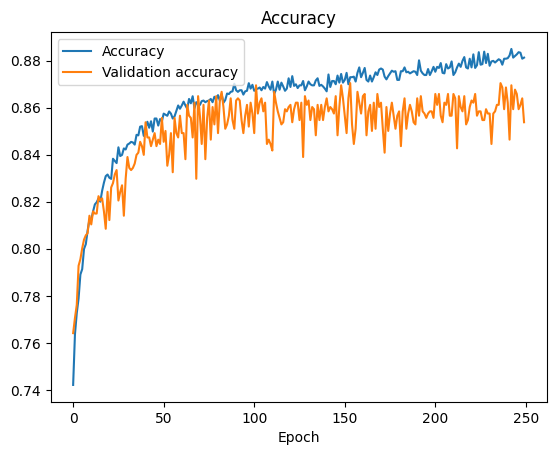

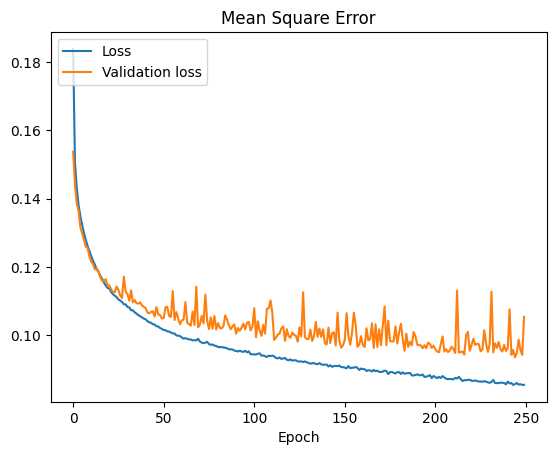

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                300       
                                                                 
 dense_10 (Dense)            (None, 25)                1275      
                                                                 
 dense_11 (Dense)            (None, 1)                 26        
                                                                 
Total params: 1601 (6.25 KB)
Trainable params: 1601 (6.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



169/169 [==============================] - 0s 2ms/step - loss: 0.0941 - accuracy: 0.8671
Accuracy: 86.71


In [24]:
# Define the model using keras
nn = Sequential()

#-------------------------------------------------------------------------------
# TO-DO block: Include your code below
#-------------------------------------------------------------------------------

#Capa 1
nn.add(Dense(50, 'relu', input_shape=(5,), use_bias=True))

#Capa 2
nn.add(Dense(25, 'relu', use_bias=True))

#Capa3
nn.add(Dense(1, 'linear', use_bias=True))

# Compile
learning_RATE=0.01
nn.compile(optimizer = keras.optimizers.SGD(learning_rate=learning_RATE), loss='mse', metrics=['accuracy'])


#-------------------------------------------------------------------------------
# End of TO-DO block
#-------------------------------------------------------------------------------

# Fit
history = nn.fit(x, y, epochs=250, verbose=1, validation_split=0.2)

# Plot history

print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Network details
nn.summary()
print('\n\n')

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = nn.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))

# <font color="#CA3532">SESSION 2</font>


### <font color="#CA3532">Dataset input</font>


In [ ]:
# Load here your selected dataset considering input and output dimensions

### <font color="#CA3532">Standar choice</font>

- Evaluate the training with a standard choice of cost and activation functions, learning rate, weight initialization and network topology.
- Generate the loss and accuracy figures

In [ ]:
# Code

### <font color="#CA3532">Optimizations</font>

- Evaluate each of the following optimization methods using the same representation and the duration of the training in terms of epochs to reach a choice of error and also in terms of time taken.

 a) Regularization

 b) Dropout

 c) Stochastic gradient descent

 d) Momentum  (including Nesterov version)

 e) AdaGrad

 f) RMSProp

 g) Adam

 h) Optimize

In [ ]:
# a) Regularization

In [ ]:
# b) Dropout

In [ ]:
# c) Stochastic gradient descent

In [ ]:
# d) Momentum  (including Nesterov version)

In [ ]:
# e) AdaGrad

In [ ]:
# f) RMSProp

In [ ]:
# g) Adam

In [ ]:
#  h) Optimize

### <font color="#CA3532">Implement parallelization in Keras with the best optimization</font>






*   Run tests for GPU presence

*   Use your best implementation from the previous exercise here and compare the training time both with GPUs and without GPUs.

Comment all your results.



